<div dir = "rtl" style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
            تمرین هفته دوازدهم بوت کمپ یادگیری ماشین-
            مپصا
        </div>
        <br/>
    </font>
</div>

In [1]:
# import all packages and libraries here.
import numpy as np
import pandas as pd

# 1- State with reasons whether the following sentences are true or false?

<ul style="font-size:25px">
    <li>
        SVMs are not suitable for large datasets.
    </li>
    <li>
       SVMs perform poorly in imbalanced datasets.
    </li>
     <li>
        SVMs perform poorly when there is just too much noise in the data.
    </li>
</ul>

# TODO
### 1_True because the training complexity of SVM is highly dependent on the size of data set.and training time is experiencing exponential growth
### 2_True More specifically, an SVM classifier trained on an imbalanced dataset often produces models which are biased towards the majority class and have low performance on the mi- nority class
### 3_True In these cases of noisy data, target classes are overlapping, in the sense that the features can have very similar or overlapping properties. This possibly results in arriving at several local optima due to the nature of the optimization algorithm, especially for high dimensional datasets.

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ۲- دیتاست lsvt-voice-rehabilitation را از لینک زیر دانلود کنید و به سوالات زیر حواب دهید. در این تمرین مجاز به استفاده از کتابخانه scikit-learn می باشید.
		</br>
</div>
		https://archive.ics.uci.edu/ml/datasets/LSVT+Voice+Rehabilitation

In [2]:
lstv=pd.ExcelFile('LSVT_voice_rehabilitation.xlsx')
data=pd.read_excel(lstv,'Data')
binary=pd.read_excel(lstv,'Binary response')
subject=pd.read_excel(lstv,'Subject demographics')

In [4]:
binary['Binary class 1=acceptable, 2=unacceptable'].value_counts()

Binary class 1=acceptable, 2=unacceptable
2    84
1    42
Name: count, dtype: int64

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 الف- داده ها را به روشهای زیر دسته بندی کنید (حواستان باشد که داده ها را قبل از اعمال به مدل، نرمالایز کنید).
        <ul>
            <li>
            کرنل خطی
            </li>
            <li>
            کرنل چندجمله ای (پارامترهای r, d)
            </li>
            <li>
            کرنل rbf - پارامتر گاما
            </li>
            <li>
            سیگمویید - پارامتر r
            </li>           
         </ul>
</div

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler(data)

In [6]:
df=pd.concat([data,binary,subject],axis=1)

In [7]:
df.rename({'Binary class 1=acceptable, 2=unacceptable':'acceptable'},axis=1,inplace=True)

In [8]:
df.isna().sum()

Jitter->F0_abs_dif                       0
Jitter->F0_dif_percent                   0
Jitter->F0_PQ5_classical_Schoentgen      0
Jitter->F0_PQ5_classical_Baken           0
Jitter->F0_PQ5_generalised_Schoentgen    0
                                        ..
det_TKEO_std4_10_coef                    0
acceptable                               0
Subject_index                            0
Age                                      0
Gender, 0->Male, 1->Female               0
Length: 314, dtype: int64

In [9]:
X=df.drop('acceptable',axis=1)
y=df['acceptable']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
standard_scale=StandardScaler()

# kernels:
linear_svc=SVC(kernel='linear')
polynomial_svs=SVC(kernel='poly',degree=3,coef0=1)
rbf_svc=SVC(kernel='rbf',gamma='auto')
sigmoid_svc=SVC(kernel='sigmoid',coef0=1)
#pipeline
linear_kernel=make_pipeline(standard_scale,linear_svc)
polynomial_kernel=make_pipeline(standard_scale,polynomial_svs)
rbf_kernel=make_pipeline(standard_scale,rbf_svc)
sigmoid_kernel=make_pipeline(standard_scale,sigmoid_svc)

In [12]:
linear_kernel.fit(X_train,y_train)
polynomial_kernel.fit(X_train,y_train)
rbf_kernel.fit(X_train,y_train)
sigmoid_kernel.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(coef0=1, kernel='sigmoid'))])

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ب- معیار دقت و f1 را برای هریک از دسته بندی های قسمت الف به دست آورید. (برای هر یک از پارامترهای گفته شده حداقل سه مقدار مختلف در نظر بگیرید)
		</br>
</div>

In [13]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [14]:

def eval_metrics(y_true,prediction,model):
    print(f'recall : {recall_score(y_true,model.predict(prediction))}')
    print(f'precision : {precision_score(y_true,model.predict(prediction))}')
    print(f'f1_score : {f1_score(y_true,model.predict(prediction))}')


In [15]:
print('linear_ kernel')
eval_metrics(y_test,X_test,linear_kernel)

linear_ kernel
recall : 1.0
precision : 0.5
f1_score : 0.6666666666666666


In [16]:
print('polynomial_ kernel')
eval_metrics(y_test,X_test,polynomial_kernel)

polynomial_ kernel
recall : 1.0
precision : 0.75
f1_score : 0.8571428571428571


In [17]:
print('rbf_ kernel')
eval_metrics(y_test,X_test,rbf_kernel)

rbf_ kernel
recall : 0.8333333333333334
precision : 1.0
f1_score : 0.9090909090909091


In [18]:
print('sigmid_ kernel')
eval_metrics(y_test,X_test,sigmoid_kernel)

sigmid_ kernel
recall : 0.3333333333333333
precision : 1.0
f1_score : 0.5


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [20]:
linear_params={'svm_linear__C':[1,2,3],'svm_linear__kernel':['linear']}
linear_model=Pipeline([('scale',standard_scale),('svm_linear',SVC())])
linear_grid=GridSearchCV(linear_model,param_grid=linear_params,scoring='f1')

In [21]:
linear_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm_linear', SVC())]),
             param_grid={'svm_linear__C': [1, 2, 3],
                         'svm_linear__kernel': ['linear']},
             scoring='f1')

In [22]:
pd.DataFrame(linear_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_linear__C,param_svm_linear__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015206,0.009807,0.006526,0.006006,1,linear,"{'svm_linear__C': 1, 'svm_linear__kernel': 'li...",0.588235,0.833333,0.666667,0.8,0.714286,0.720504,0.088862,1
1,0.010612,0.009699,0.007453,0.007029,2,linear,"{'svm_linear__C': 2, 'svm_linear__kernel': 'li...",0.588235,0.833333,0.666667,0.8,0.714286,0.720504,0.088862,1
2,0.017440,0.002342,0.008885,0.008368,3,linear,"{'svm_linear__C': 3, 'svm_linear__kernel': 'li...",0.588235,0.833333,0.666667,0.8,0.714286,0.720504,0.088862,1


In [23]:
poly_params={'svm_poly__degree':[1,2,3],'svm_poly__coef0':[2,3,4],'svm_poly__kernel':['poly']}
poly_model=Pipeline([('scale',standard_scale),('svm_poly',SVC())])
poly_grid=GridSearchCV(poly_model,param_grid=poly_params,scoring='f1',n_jobs=-1)

In [24]:
poly_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm_poly', SVC())]),
             n_jobs=-1,
             param_grid={'svm_poly__coef0': [2, 3, 4],
                         'svm_poly__degree': [1, 2, 3],
                         'svm_poly__kernel': ['poly']},
             scoring='f1')

In [25]:
pd.DataFrame(poly_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_poly__coef0,param_svm_poly__degree,param_svm_poly__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021901,0.010364,0.012529,0.007756,2,1,poly,"{'svm_poly__coef0': 2, 'svm_poly__degree': 1, ...",0.666667,0.727273,0.833333,0.444444,0.714286,0.677201,0.128488,7
1,0.020282,0.005963,0.008730,0.004412,2,2,poly,"{'svm_poly__coef0': 2, 'svm_poly__degree': 2, ...",0.750000,0.923077,0.823529,0.800000,0.714286,0.802178,0.071449,1
2,0.016603,0.000485,0.010598,0.001016,2,3,poly,"{'svm_poly__coef0': 2, 'svm_poly__degree': 3, ...",0.750000,0.923077,0.736842,0.666667,0.714286,0.758174,0.087195,3
3,0.015798,0.000745,0.010801,0.000750,3,1,poly,"{'svm_poly__coef0': 3, 'svm_poly__degree': 1, ...",0.666667,0.727273,0.833333,0.444444,0.714286,0.677201,0.128488,7
4,0.017197,0.001167,0.010402,0.000490,3,2,poly,"{'svm_poly__coef0': 3, 'svm_poly__degree': 2, ...",0.750000,0.833333,0.777778,0.750000,0.714286,0.765079,0.039635,2
5,0.016395,0.000801,0.010199,0.000751,3,3,poly,"{'svm_poly__coef0': 3, 'svm_poly__degree': 3, ...",0.750000,0.833333,0.736842,0.666667,0.714286,0.740226,0.054516,4
6,0.015198,0.000979,0.009400,0.001020,4,1,poly,"{'svm_poly__coef0': 4, 'svm_poly__degree': 1, ...",0.666667,0.727273,0.833333,0.444444,0.714286,0.677201,0.128488,7
7,0.015599,0.001202,0.009800,0.000748,4,2,poly,"{'svm_poly__coef0': 4, 'svm_poly__degree': 2, ...",0.625000,0.833333,0.777778,0.666667,0.714286,0.723413,0.074869,5
8,0.017599,0.002245,0.010601,0.000798,4,3,poly,"{'svm_poly__coef0': 4, 'svm_poly__degree': 3, ...",0.625000,0.833333,0.736842,0.666667,0.714286,0.715226,0.070592,6


In [26]:
sigmoid_params={'svm_sigmoid__coef0':[-1,0,1],'svm_sigmoid__kernel':['sigmoid']}
sigmoid_model=Pipeline([('scale',standard_scale),('svm_sigmoid',SVC())])
sigmoid_grid=GridSearchCV(sigmoid_model,param_grid=sigmoid_params,n_jobs=-1)

In [27]:
sigmoid_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm_sigmoid', SVC())]),
             n_jobs=-1,
             param_grid={'svm_sigmoid__coef0': [-1, 0, 1],
                         'svm_sigmoid__kernel': ['sigmoid']})

In [28]:
pd.DataFrame(sigmoid_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_sigmoid__coef0,param_svm_sigmoid__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018466,0.002107,0.007301,0.000730,-1,sigmoid,"{'svm_sigmoid__coef0': -1, 'svm_sigmoid__kerne...",0.8,0.75,0.85,0.75,0.80,0.79,0.037417,2
1,0.011199,0.006690,0.010995,0.005813,0,sigmoid,"{'svm_sigmoid__coef0': 0, 'svm_sigmoid__kernel...",0.8,0.90,0.95,0.75,0.80,0.84,0.073485,1
2,0.012711,0.005832,0.006250,0.007655,1,sigmoid,"{'svm_sigmoid__coef0': 1, 'svm_sigmoid__kernel...",0.7,0.65,0.65,0.75,0.65,0.68,0.040000,3


In [29]:
rbf_params={'svm_rbf__gamma':[0.01,1,2,5,8,'auto','scale'],'svm_rbf__kernel':['rbf']}
rbf_model=Pipeline([('scale',standard_scale),('svm_rbf',SVC())])
rbf_grid=GridSearchCV(rbf_model,param_grid=rbf_params,scoring='f1',n_jobs=-1)

In [30]:
rbf_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm_rbf', SVC())]),
             n_jobs=-1,
             param_grid={'svm_rbf__gamma': [0.01, 1, 2, 5, 8, 'auto', 'scale'],
                         'svm_rbf__kernel': ['rbf']},
             scoring='f1')

In [31]:
pd.DataFrame(rbf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_rbf__gamma,param_svm_rbf__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019175,0.006083,0.010733,0.002636,0.01,rbf,"{'svm_rbf__gamma': 0.01, 'svm_rbf__kernel': 'r...",0.545455,0.727273,0.833333,0.444444,0.545455,0.619192,0.140676,3
1,0.018752,0.006252,0.006249,0.007654,1,rbf,"{'svm_rbf__gamma': 1, 'svm_rbf__kernel': 'rbf'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
2,0.022439,0.008069,0.008763,0.004531,2,rbf,"{'svm_rbf__gamma': 2, 'svm_rbf__kernel': 'rbf'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,0.029278,0.018939,0.014310,0.001674,5,rbf,"{'svm_rbf__gamma': 5, 'svm_rbf__kernel': 'rbf'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
4,0.012281,0.003009,0.009375,0.007655,8,rbf,"{'svm_rbf__gamma': 8, 'svm_rbf__kernel': 'rbf'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
5,0.013310,0.004628,0.009376,0.007655,auto,rbf,"{'svm_rbf__gamma': 'auto', 'svm_rbf__kernel': ...",0.769231,0.600000,0.833333,0.444444,0.800000,0.689402,0.146504,1
6,0.015625,0.000002,0.009375,0.007654,scale,rbf,"{'svm_rbf__gamma': 'scale', 'svm_rbf__kernel':...",0.769231,0.600000,0.833333,0.444444,0.800000,0.689402,0.146504,1


<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ج- تاثیر پارامترهای هر کرنل را بر کارآیی مدل ها تحلیل کنید.
		</br>
</div>

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 د- کدام مدل عملکرد بهتری دارد؟ چرا؟
		</br>
</div>

#### sigmoid kernel with r=0 is better than others because the output of our target is binary and sigmoid is better with binary dataset predction

# 3- Student Intervention System

<div style="margin-left: 10px;font-size:25px">a) Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed', will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.</div>

In [33]:
student_data = pd.read_csv("student_data.csv")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [34]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

student_data['passed']=student_data['passed'].apply(lambda x:0 if x=='no' else 1)

In [36]:
numeric_feature=student_data.select_dtypes('int64')
numeric_feature

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,1
392,21,1,1,1,1,3,5,5,3,3,3,3,3,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,1


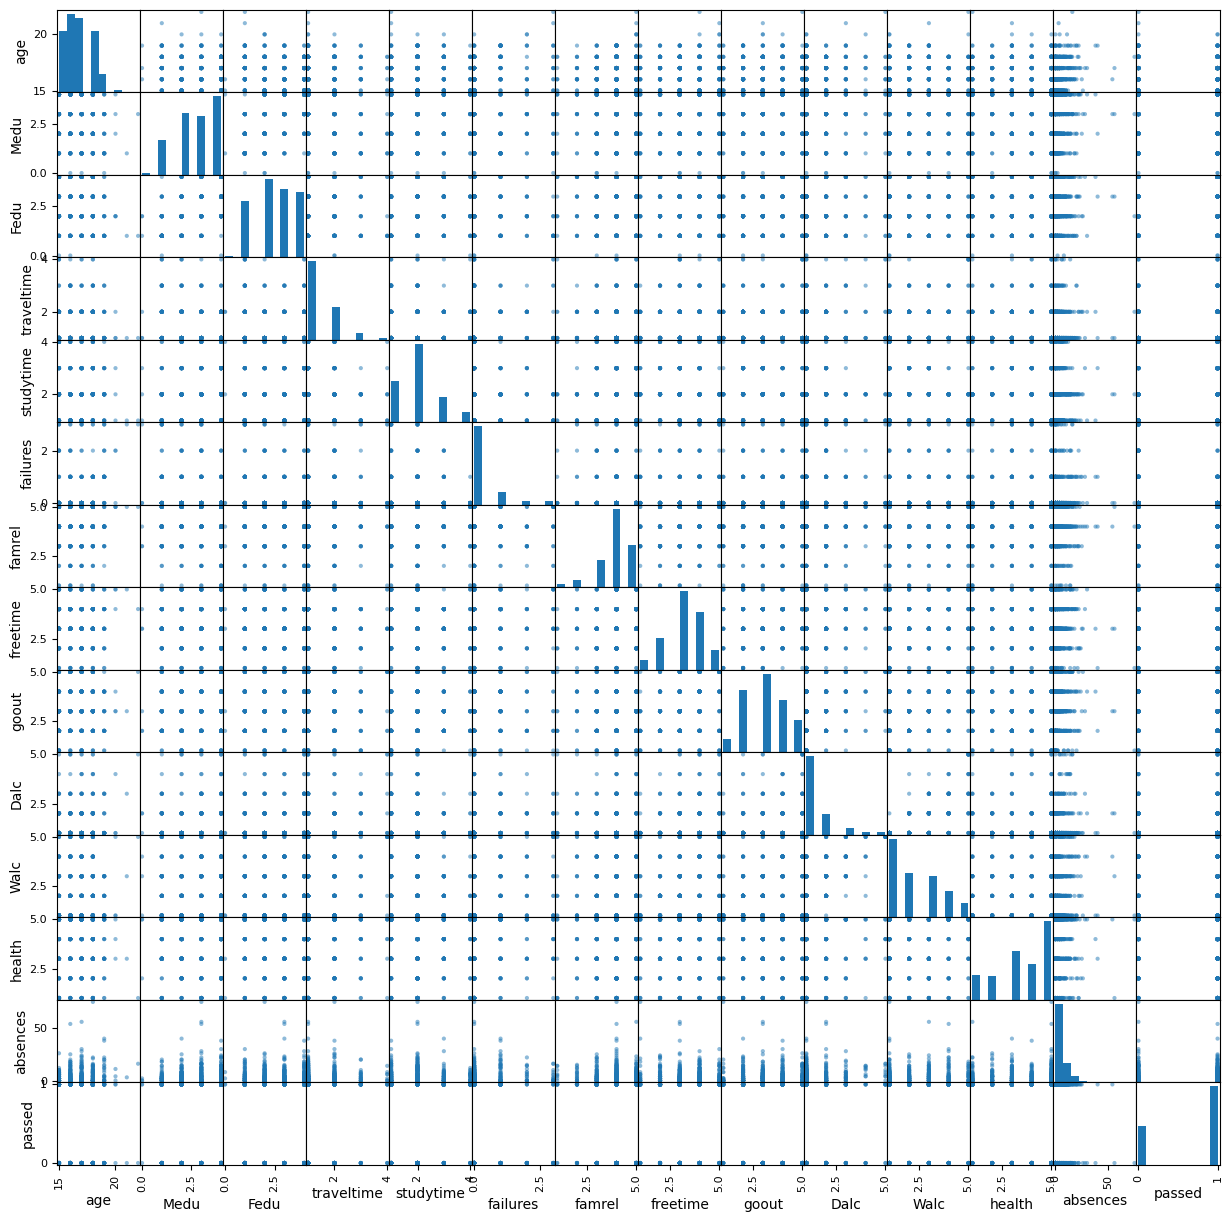

In [37]:

pd.plotting.scatter_matrix(numeric_feature,figsize=(15,15));

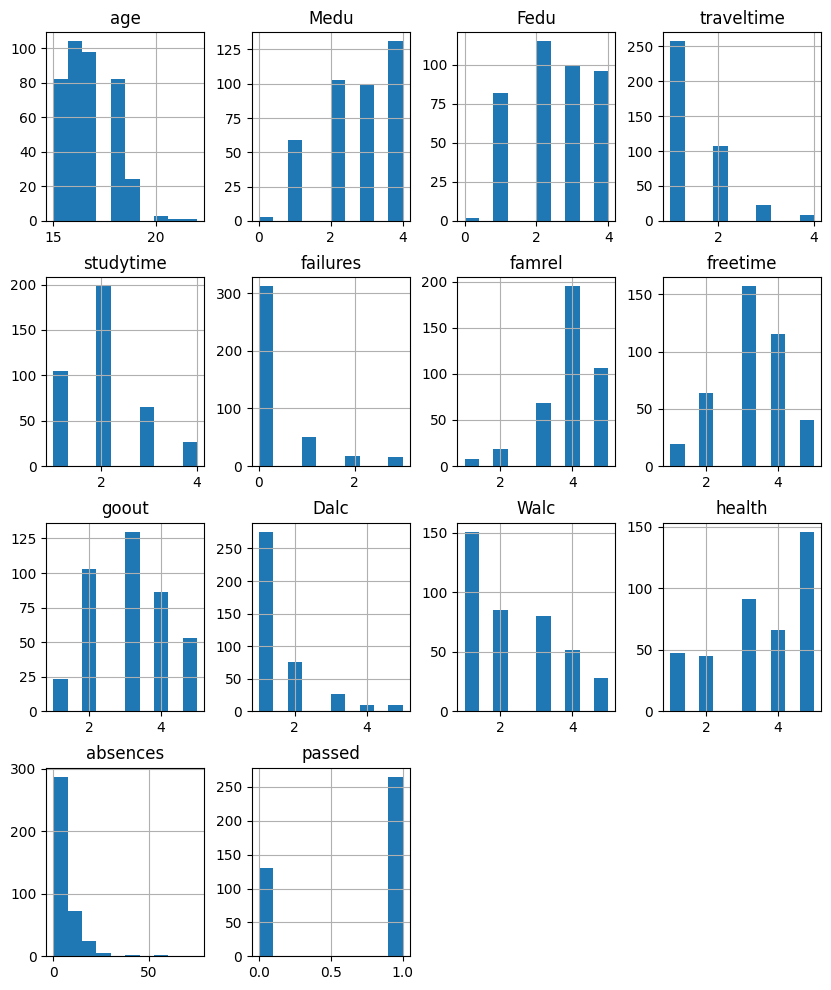

In [38]:

numeric_feature.hist(figsize=(10,12));

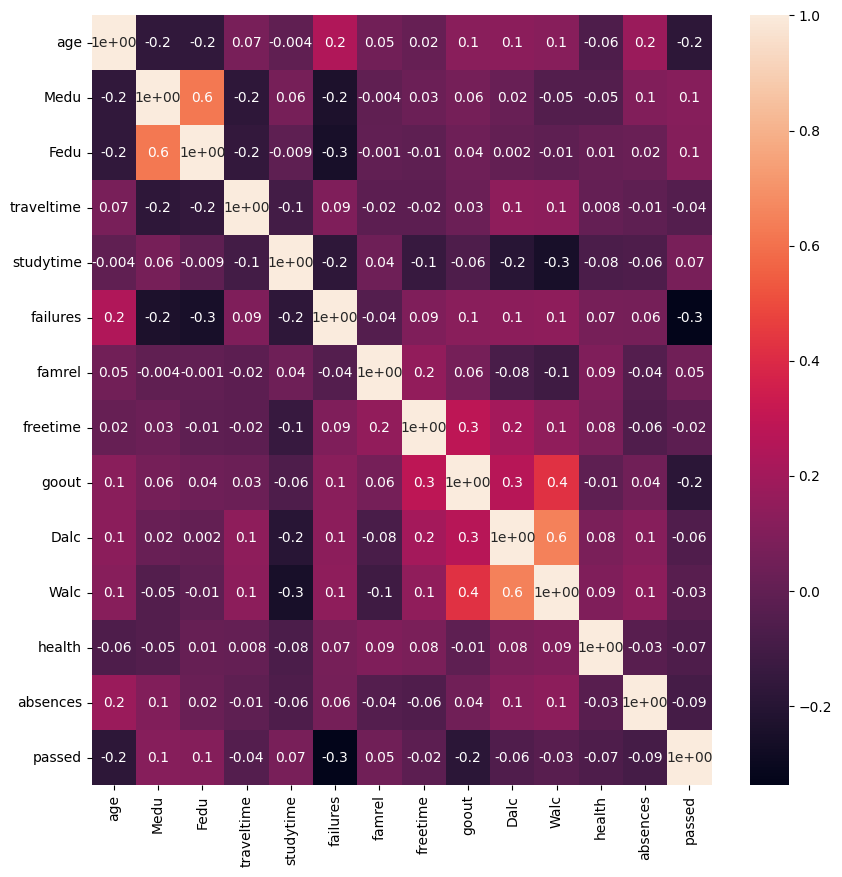

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_feature.corr(),annot=True,fmt='.1')
plt.show()

<div style="margin-left: 10px;font-size:25px">
  <p>  
b) Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
    </p>
    <ul>
        <li>The total number of students, n_students.</li>
        <li>The total number of features for each student, n_features.</li>
        <li>The number of those students who passed, n_passed.</li>
        <li>The number of those students who failed, n_failed.</li>
        <li>The graduation rate of the class, grad_rate, in percent (%).</li>
     </ul>

</div>

In [40]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [41]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
feature=student_data.drop('passed',axis=1)
n_features = len(feature)

# TODO: Calculate passing students
n_passed = (student_data['passed']=='yes').sum()
# TODO: Calculate failing students
n_failed = (student_data['passed']=='no').sum()

# TODO: Calculate graduation rate
grad_rate = n_passed/n_students

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 395
Number of students who passed: 0
Number of students who failed: 0
Graduation rate of the class: 0.00%


<div style="margin-left: 10px;font-size:25px">
    <p>c) Preparing the Data</p>
    <p>In this section, we will prepare the data for modeling, training and testing.</p>
    <p>Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.</p>
</div>




In [42]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X = student_data[feature_cols]
y = student_data[target_col]

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


<div style="margin-left: 10px;font-size:25px">
    <p>d) Preprocess Feature Columns</p>
    <p>As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.</p>
    <p>
Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.</p>
</div>


In [43]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():

        # If data type is non-numeric, replace all binary values with 1/0
        if col_data.dtype == object and len(col_data.unique()) == 2:
            print("*****binary*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            col_data = col_data.replace(col_data_unique, [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object and len(col_data.unique()) != 2:
            print("*****categorical*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_preprocessed = preprocess_features(X)

*****binary*****
col name:  school----unique values:  ['GP' 'MS']
*****binary*****
col name:  sex----unique values:  ['F' 'M']
*****binary*****
col name:  address----unique values:  ['U' 'R']
*****binary*****
col name:  famsize----unique values:  ['GT3' 'LE3']
*****binary*****
col name:  Pstatus----unique values:  ['A' 'T']
*****categorical*****
col name:  Mjob----unique values:  ['at_home' 'health' 'other' 'services' 'teacher']
*****categorical*****
col name:  Fjob----unique values:  ['teacher' 'other' 'services' 'health' 'at_home']
*****categorical*****
col name:  reason----unique values:  ['course' 'other' 'home' 'reputation']
*****categorical*****
col name:  guardian----unique values:  ['mother' 'father' 'other']
*****binary*****
col name:  schoolsup----unique values:  ['yes' 'no']
*****binary*****
col name:  famsup----unique values:  ['no' 'yes']
*****binary*****
col name:  paid----unique values:  ['no' 'yes']
*****binary*****
col name:  activities----unique values:  ['no' 'yes']


In [44]:
X_preprocessed

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,1,18,1,1,1,4,4,True,False,...,1,1,1,4,3,4,1,1,3,6
1,1,1,17,1,1,0,1,1,True,False,...,1,0,1,5,3,3,1,1,3,4
2,1,1,15,1,0,0,1,1,True,False,...,1,0,1,4,3,2,2,3,3,10
3,1,1,15,1,1,0,4,2,False,True,...,1,0,0,3,2,2,1,1,5,2
4,1,1,16,1,1,0,3,3,False,False,...,1,1,1,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,1,2,2,False,False,...,1,1,1,5,5,4,4,5,4,11
391,0,0,17,1,0,0,3,1,False,False,...,1,0,1,2,4,5,3,4,2,3
392,0,0,21,0,1,0,1,1,False,False,...,1,1,1,5,5,3,3,3,3,3
393,0,0,18,0,0,0,3,2,False,False,...,1,0,1,4,4,1,3,4,5,0


<div style="margin-left: 10px;font-size:25px">
    <p>e) Training and Testing Data Split</p>
    <p>split the data (both features and corresponding labels) into training and test sets.(Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).)</p>
</div>

In [45]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
# TODO: split the dataset into the number of training and testing
X_train,X_test,y_train,y_test=train_test_split(X_preprocessed,y,test_size=0.25)

In [46]:
X_train.shape , X_test.shape

((296, 43), (99, 43))

<div style="margin-left: 10px;font-size:25px">
<p>f) In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to training data and measure the F1 score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F1 score on the training set, and F1 score on the testing set.</p>
<p>The following supervised learning models are currently available in scikit-learn that you may choose from:</p>
    <ul>
        <li>Gaussian Naive Bayes (GaussianNB)</li>
        <li>K-Nearest Neighbors (KNeighbors)</li>
        <li>Stochastic Gradient Descent (SGDC)</li>
        <li>Support Vector Machines (SVM)</li>
        <li>Logistic Regression</li>
     </ul>
</div>    

In [47]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [48]:
X_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   address            395 non-null    int64
 4   famsize            395 non-null    int64
 5   Pstatus            395 non-null    int64
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   Mjob_at_home       395 non-null    bool 
 9   Mjob_health        395 non-null    bool 
 10  Mjob_other         395 non-null    bool 
 11  Mjob_services      395 non-null    bool 
 12  Mjob_teacher       395 non-null    bool 
 13  Fjob_at_home       395 non-null    bool 
 14  Fjob_health        395 non-null    bool 
 15  Fjob_other         395 non-null    bool 
 16  Fjob_services      395 non-null    bool 
 17  Fjob_teacher    

In [58]:
numeric_features=X_preprocessed.select_dtypes('int64')
numeric_features.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
scaler=make_pipeline(StandardScaler())
preprocessing=ColumnTransformer([('numeric_feature_scaler',scaler,numeric_features.columns)],remainder='passthrough')

#svc model:
svc_model=make_pipeline(preprocessing,SVC(kernel='sigmoid'))

#Gausian_naive_bayes model:
gnb_model=make_pipeline(preprocessing,GaussianNB())

#KNN model:
KN_model=Pipeline([('preprocess',preprocessing),('KN_model',KNeighborsClassifier())])
KN_params={'KN_model__n_neighbors':[2,5,7,10]}
KN_grid=GridSearchCV(KN_model,KN_params)

#Logestic model:
logestic_model=Pipeline([('preprocess',preprocessing),('logestic',LogisticRegression())])
logestic_params={'logestic__C':[2,5,7,10]}
logestic_grid=GridSearchCV(logestic_model,logestic_params)

#SGDC model:
sgdc_model=make_pipeline(preprocessing,SGDClassifier())


In [77]:
from sklearn.metrics import classification_report

In [78]:
svc=svc_model.fit(X_train,y_train)
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46        26
           1       0.80      0.95      0.87        73

    accuracy                           0.79        99
   macro avg       0.75      0.65      0.66        99
weighted avg       0.77      0.79      0.76        99



In [79]:
gnb=gnb_model.fit(X_train,y_train)
print(classification_report(y_test,gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.40      0.38      0.39        26
           1       0.78      0.79      0.79        73

    accuracy                           0.69        99
   macro avg       0.59      0.59      0.59        99
weighted avg       0.68      0.69      0.68        99



In [80]:
KN=KN_grid.fit(X_train,y_train)
print(classification_report(y_test,KN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.29      0.15      0.20        26
           1       0.74      0.86      0.80        73

    accuracy                           0.68        99
   macro avg       0.51      0.51      0.50        99
weighted avg       0.62      0.68      0.64        99



In [82]:
logestic=logestic_grid.fit(X_train,y_train)
print(classification_report(y_test,logestic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.35      0.42        26
           1       0.79      0.89      0.84        73

    accuracy                           0.75        99
   macro avg       0.66      0.62      0.63        99
weighted avg       0.72      0.75      0.73        99



In [83]:
sgdc=sgdc_model.fit(X_train,y_train)
print(classification_report(y_test,sgdc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.35      0.65      0.46        26
           1       0.82      0.58      0.68        73

    accuracy                           0.60        99
   macro avg       0.59      0.61      0.57        99
weighted avg       0.70      0.60      0.62        99

